In [65]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('F:/UOC/Level 4/Machine learning/Data analysis project 1/Train.csv')
Dataset_Test = pd.read_csv('F:/UOC/Level 4/Machine learning/Data analysis project 1/Test.csv')

# Display first 5 rows
Dataset_Train.head()
Dataset_Test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [66]:
#Print dimension
print("Dimensions Train (Rows, Columns):", Dataset_Train.shape)
print("Dimensions Test (Rows, Columns):", Dataset_Test.shape)

Dimensions Train (Rows, Columns): (8068, 11)
Dimensions Test (Rows, Columns): (2627, 11)


In [67]:
import pandas as pd
# Combine
combined = pd.concat([Dataset_Train, Dataset_Test], axis=0, ignore_index=True)

# Verify
print(f"Train shape: {Dataset_Train.shape}")       # (8068, 11)
print(f"Test shape: {Dataset_Test.shape}")         # (2627, 11)
print(f"Combined shape: {combined.shape}") # (8068 + 2627, 11)


Train shape: (8068, 11)
Test shape: (2627, 11)
Combined shape: (10695, 11)


In [68]:
# 3. Check for duplicates
print("Number of duplicate rows(Train):", Dataset_Train.duplicated().sum())
print("Number of duplicate rows(Test):", Dataset_Test.duplicated().sum())
print("Number of duplicate rows(Combined):", combined.duplicated().sum())


Number of duplicate rows(Train): 0
Number of duplicate rows(Test): 0
Number of duplicate rows(Combined): 38


In [69]:
# 1. Add source markers
Dataset_Train['source'] = 'train'
Dataset_Test['source'] = 'test'

# 2. Combine datasets
combined = pd.concat([Dataset_Train, Dataset_Test], ignore_index=True)

# 3. Find duplicates (across all columns except 'source')
cols_to_check = combined.columns.difference(['source'])
duplicates_mask = combined.duplicated(subset=cols_to_check, keep=False)
duplicates = combined[duplicates_mask]

# 4. Sort dupli# cates for better visualization
duplicates_sorted = duplicates.sort_values(by=list(cols_to_check))

# 5. Configure display to show all columns in one line
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

# 6. Print the duplicates
print("\nDUPLICATE ROWS (BETWEEN TRAIN AND TEST SETS):")
print(duplicates_sorted.to_string(line_width=1000))

# 7. Count duplicates by source
print("\nDUPLICATE COUNTS BY SOURCE:")
print(duplicates['source'].value_counts())

# 8. Reset display options
pd.reset_option('display.width')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')



DUPLICATE ROWS (BETWEEN TRAIN AND TEST SETS):
           ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience Spending_Score  Family_Size  Var_1 Segmentation source
3992   466750  Female           No   18       NaN     Healthcare              0.0            Low          3.0  Cat_3            D  train
10337  466750  Female           No   18       NaN     Healthcare              0.0            Low          3.0  Cat_3            D   test
2583   459763    Male           No   18        No         Artist              NaN            Low          4.0  Cat_4            D  train
8314   459763    Male           No   18        No         Artist              NaN            Low          4.0  Cat_4            D   test
32     462454    Male           No   19        No     Healthcare              1.0            Low          3.0  Cat_2            D  train
9107   462454    Male           No   19        No     Healthcare              1.0            Low          3.0  Cat_2            D  

In [70]:
Dataset_Train = Dataset_Train.drop(columns=['source'])
Dataset_Test = Dataset_Test.drop(columns=['source'])
combined = combined.drop(columns=['source'])

combined_new = combined.drop_duplicates()
print("Dimensions combined (Rows, Columns):", combined.shape)
print("Dimensions combined new (Rows, Columns):", combined_new.shape)



Dimensions combined (Rows, Columns): (10695, 11)
Dimensions combined new (Rows, Columns): (10657, 11)


In [71]:
# 4. Check data types of variables
print("\nData types of each column:")
print(combined_new.dtypes)


Data types of each column:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


In [72]:
#5. For a more detailed overview including non-null counts
print("\nDetailed info:")
print(combined_new.info())


Detailed info:
<class 'pandas.core.frame.DataFrame'>
Index: 10657 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10657 non-null  int64  
 1   Gender           10657 non-null  object 
 2   Ever_Married     10468 non-null  object 
 3   Age              10657 non-null  int64  
 4   Graduated        10557 non-null  object 
 5   Profession       10495 non-null  object 
 6   Work_Experience  9567 non-null   float64
 7   Spending_Score   10657 non-null  object 
 8   Family_Size      10210 non-null  float64
 9   Var_1            10549 non-null  object 
 10  Segmentation     10657 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 999.1+ KB
None


In [73]:
#6. Identify object type columns
object_cols = combined_new.select_dtypes(include=['object']).columns

# Convert object type columns to category
combined_new[object_cols] = combined_new[object_cols].astype('category')

# Verify the conversion
print("Data types after conversion:")
print(combined_new.dtypes)

# Optional: Show memory usage before and after conversion
print("\nMemory usage before conversion:", combined_new.memory_usage(deep=True).sum()/1024, "KB")

Data types after conversion:
ID                    int64
Gender             category
Ever_Married       category
Age                   int64
Graduated          category
Profession         category
Work_Experience     float64
Spending_Score     category
Family_Size         float64
Var_1              category
Segmentation       category
dtype: object

Memory usage before conversion: 491.8486328125 KB


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\741393307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_new[object_cols] = combined_new[object_cols].astype('category')


In [74]:
from sklearn.model_selection import train_test_split
train_new, test_new = train_test_split(
    combined_new,
    test_size=0.2,  # Adjust ratio
    stratify=combined_new['Segmentation']  # Preserve class balance
)

# Verify shapes
print("Training set shape:", train_new.shape)
print("Testing set shape:", test_new.shape)

# Check class distribution (optional)
print("\nClass balance in Training set:")
print(train_new['Segmentation'].value_counts(normalize=True))

print("\nClass balance in Testing set:")
print(test_new['Segmentation'].value_counts(normalize=True))


Training set shape: (8525, 11)
Testing set shape: (2132, 11)

Class balance in Training set:
Segmentation
D    0.282229
A    0.263930
C    0.228387
B    0.225455
Name: proportion, dtype: float64

Class balance in Testing set:
Segmentation
D    0.282364
A    0.264071
C    0.228424
B    0.225141
Name: proportion, dtype: float64


In [75]:
# 9. Check for missing values
print("\nMissing values per column(train):")
print(train_new.isnull().sum())
print("\nMissing values per column(test):")
print(test_new.isnull().sum())


Missing values per column(train):
ID                   0
Gender               0
Ever_Married       153
Age                  0
Graduated           73
Profession         122
Work_Experience    868
Spending_Score       0
Family_Size        367
Var_1               96
Segmentation         0
dtype: int64

Missing values per column(test):
ID                   0
Gender               0
Ever_Married        36
Age                  0
Graduated           27
Profession          40
Work_Experience    222
Spending_Score       0
Family_Size         80
Var_1               12
Segmentation         0
dtype: int64


In [76]:
import pandas as pd

# Calculate missing value percentages for Train
train_missing_percent = (train_new.isnull().sum() / len(train_new)) * 100
print("Missing Value % (Train):")
print(train_missing_percent.round(2))  # Rounds to 2 decimal places

# Calculate missing value percentages for Test
test_missing_percent = (test_new.isnull().sum() / len(test_new)) * 100
print("\nMissing Value % (Test):")
print(test_missing_percent.round(2))

Missing Value % (Train):
ID                  0.00
Gender              0.00
Ever_Married        1.79
Age                 0.00
Graduated           0.86
Profession          1.43
Work_Experience    10.18
Spending_Score      0.00
Family_Size         4.30
Var_1               1.13
Segmentation        0.00
dtype: float64

Missing Value % (Test):
ID                  0.00
Gender              0.00
Ever_Married        1.69
Age                 0.00
Graduated           1.27
Profession          1.88
Work_Experience    10.41
Spending_Score      0.00
Family_Size         3.75
Var_1               0.56
Segmentation        0.00
dtype: float64


In [77]:
train_new['Ever_Married'].value_counts()

Ever_Married
Yes    4900
No     3472
Name: count, dtype: int64

In [78]:
train_new['Graduated'].value_counts()

Graduated
Yes    5226
No     3226
Name: count, dtype: int64

In [79]:
from sklearn.impute import SimpleImputer

# Initialize imputer with 'most_frequent' strategy (mode)
imputer = SimpleImputer(strategy='most_frequent')

# Apply to columns
train_new[['Ever_Married', 'Graduated']] = imputer.fit_transform(train_new[['Ever_Married', 'Graduated']])

In [80]:
print("Missing values after imputation:")
print(train_new[['Ever_Married', 'Graduated']].isnull().sum())

Missing values after imputation:
Ever_Married    0
Graduated       0
dtype: int64


In [81]:
train_new['Profession'].value_counts()

Profession
Artist           2619
Healthcare       1412
Entertainment     991
Doctor            746
Engineer          743
Lawyer            683
Executive         610
Marketing         332
Homemaker         267
Name: count, dtype: int64

In [82]:
train_new['Var_1'].value_counts()

Var_1
Cat_6    5509
Cat_4    1154
Cat_3     881
Cat_2     444
Cat_7     214
Cat_1     139
Cat_5      88
Name: count, dtype: int64

In [83]:
from sklearn.impute import SimpleImputer

# Initialize imputer with 'most_frequent' strategy (mode)
imputer = SimpleImputer(strategy='most_frequent')

# Apply to columns
train_new[['Profession', 'Var_1']] = imputer.fit_transform(train_new[['Profession', 'Var_1']])
print("Missing values after imputation:")
print(train_new[['Profession', 'Var_1']].isnull().sum())

Missing values after imputation:
Profession    0
Var_1         0
dtype: int64


In [84]:
print("\nMissing values per column(train):")
print(train_new.isnull().sum())


Missing values per column(train):
ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    868
Spending_Score       0
Family_Size        367
Var_1                0
Segmentation         0
dtype: int64


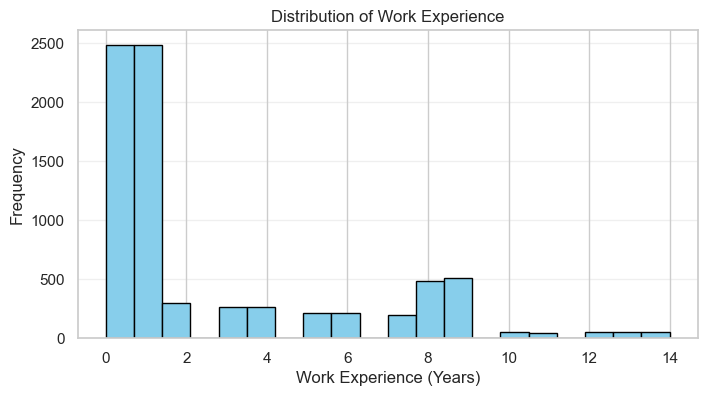

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
# Create histogram
plt.figure(figsize=(8, 4))
plt.hist(train_new['Work_Experience'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Work Experience (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Work Experience')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [86]:
print(train_new['Work_Experience'].describe())  # Stats before imputation

count    7657.000000
mean        2.624527
std         3.406412
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64


In [87]:
median_value = train_new['Work_Experience'].median()
print(median_value)

1.0


In [88]:
train_new['Work_Experience'].fillna(train_new['Work_Experience'].median(), inplace=True)
print(train_new['Work_Experience'].isnull().sum())  # Should be 0

0


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\3212401698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_new['Work_Experience'].fillna(train_new['Work_Experience'].median(), inplace=True)


(array([2481., 3353.,  295.,    0.,  266.,  268.,    0.,  214.,  211.,
           0.,  195.,  481.,  507.,    0.,   56.,   47.,    0.,   51.,
          50.,   50.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. ]),
 <BarContainer object of 20 artists>)

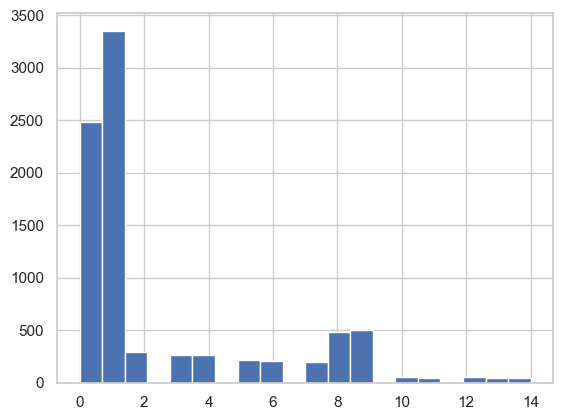

In [89]:
plt.hist(train_new['Work_Experience'], bins=20)  

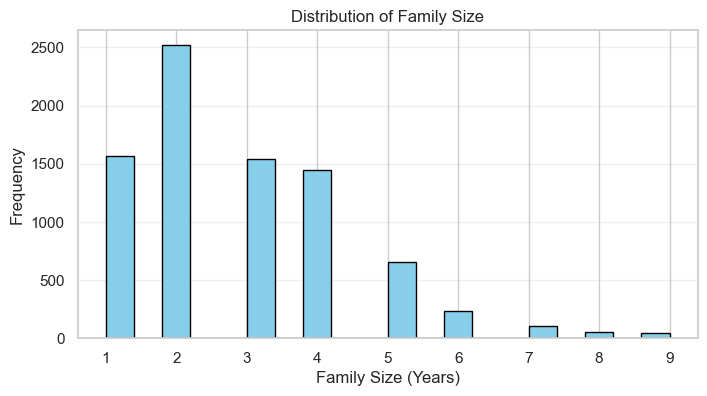

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
# Create histogram
plt.figure(figsize=(8, 4))
plt.hist(train_new['Family_Size'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Family Size (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Family Size')
plt.grid(axis='y', alpha=0.3)

plt.show()

2.0
0


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\1381929550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_new['Family_Size'].fillna(train_new['Family_Size'].median(), inplace=True)


(array([1569.,    0., 2888.,    0.,    0., 1540.,    0., 1443.,    0.,
           0.,  653.,    0.,  234.,    0.,    0.,  102.,    0.,   52.,
           0.,   44.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

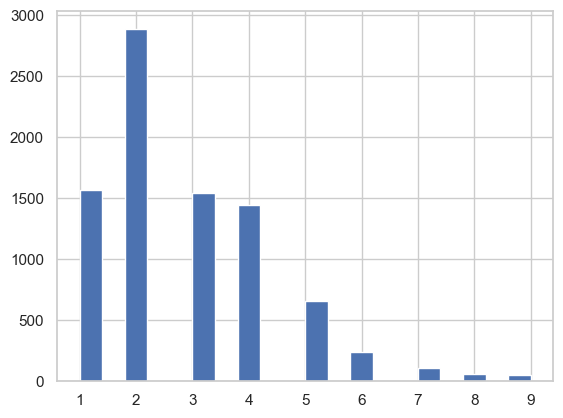

In [91]:
median_value = train_new['Family_Size'].median()
print(median_value)
train_new['Family_Size'].fillna(train_new['Family_Size'].median(), inplace=True)
print(train_new['Family_Size'].isnull().sum())  # Should be 0
plt.hist(train_new['Family_Size'], bins=20)  

In [92]:
# Categorical Variables (Impute with Mode)
test_new['Ever_Married'].fillna('Yes', inplace=True)
test_new['Graduated'].fillna('Yes', inplace=True)
test_new['Profession'].fillna('Artist', inplace=True)
test_new['Var_1'].fillna('Cat_6', inplace=True)

# Numerical Variables (Impute with Median/Mean)
test_new['Work_Experience'].fillna(1.0, inplace=True)
test_new['Family_Size'].fillna(3.0, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2066638679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_new['Ever_Married'].fillna('Yes', inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2066638679.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [93]:
print("Missing values after imputation:")
print(test_new.isnull().sum())

Missing values after imputation:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [94]:
# For multiple DataFrames (train and test)
Dataset_Train = train_new.drop(columns=['ID'])
Dataset_Test = test_new.drop(columns=['ID'])

UNIVARIALTE ANALYSIS

In [95]:
print("Data types after conversion (train):")
print(Dataset_Train.dtypes)
print("Data types after conversion (test):")
print(Dataset_Test.dtypes)

Data types after conversion (train):
Gender             category
Ever_Married         object
Age                   int64
Graduated            object
Profession           object
Work_Experience     float64
Spending_Score     category
Family_Size         float64
Var_1                object
Segmentation       category
dtype: object
Data types after conversion (test):
Gender             category
Ever_Married       category
Age                   int64
Graduated          category
Profession         category
Work_Experience     float64
Spending_Score     category
Family_Size         float64
Var_1              category
Segmentation       category
dtype: object


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2733532521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Dataset_Train, x=col, palette='viridis')


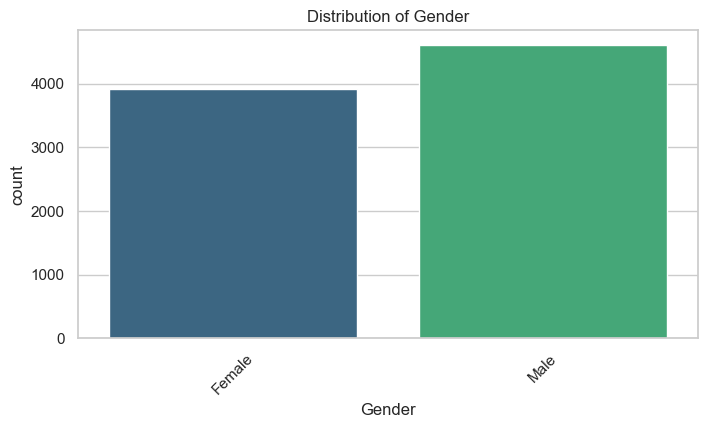


Value counts for Gender:
Gender
Male      0.540528
Female    0.459472
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2733532521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Dataset_Train, x=col, palette='viridis')


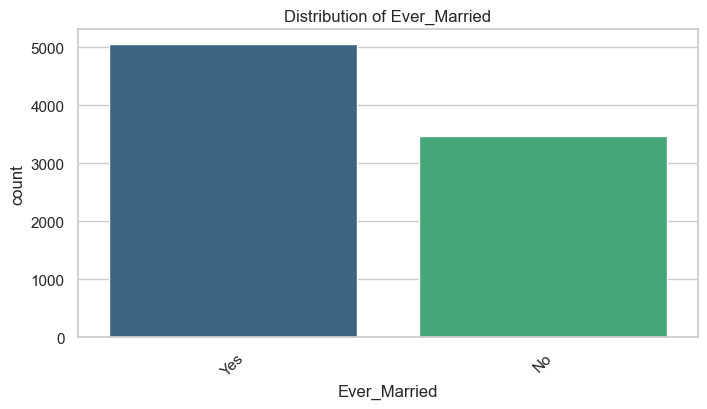


Value counts for Ever_Married:
Ever_Married
Yes    0.592727
No     0.407273
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2733532521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Dataset_Train, x=col, palette='viridis')


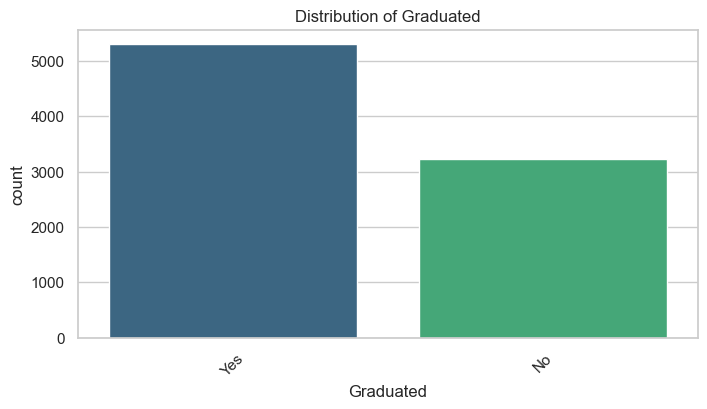


Value counts for Graduated:
Graduated
Yes    0.621584
No     0.378416
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2733532521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Dataset_Train, x=col, palette='viridis')


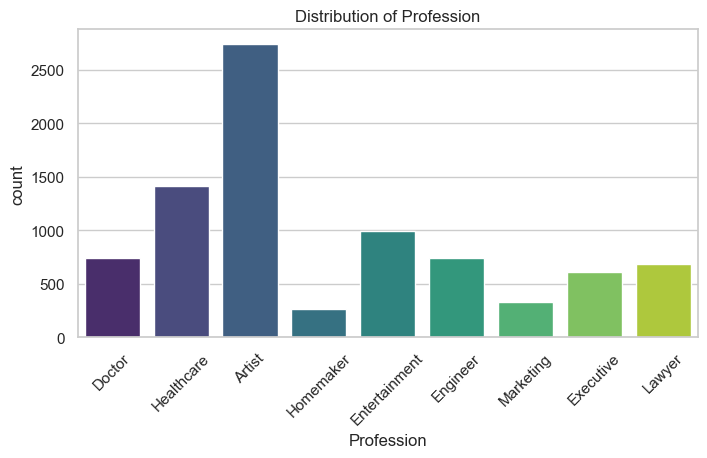


Value counts for Profession:
Profession
Artist           0.321525
Healthcare       0.165630
Entertainment    0.116246
Doctor           0.087507
Engineer         0.087155
Lawyer           0.080117
Executive        0.071554
Marketing        0.038944
Homemaker        0.031320
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2733532521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Dataset_Train, x=col, palette='viridis')


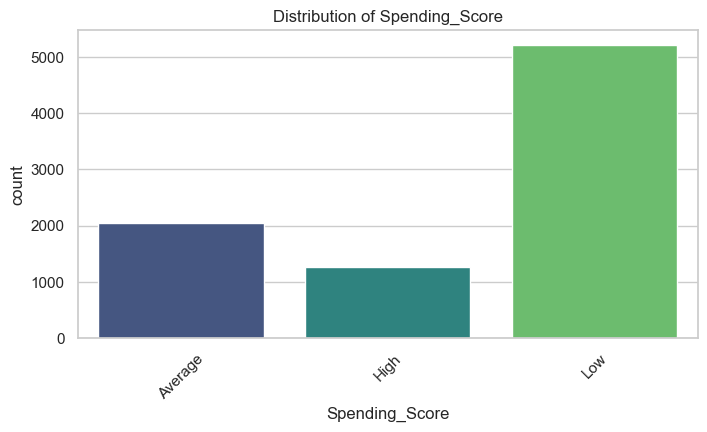


Value counts for Spending_Score:
Spending_Score
Low        0.611848
Average    0.240117
High       0.148035
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2733532521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Dataset_Train, x=col, palette='viridis')


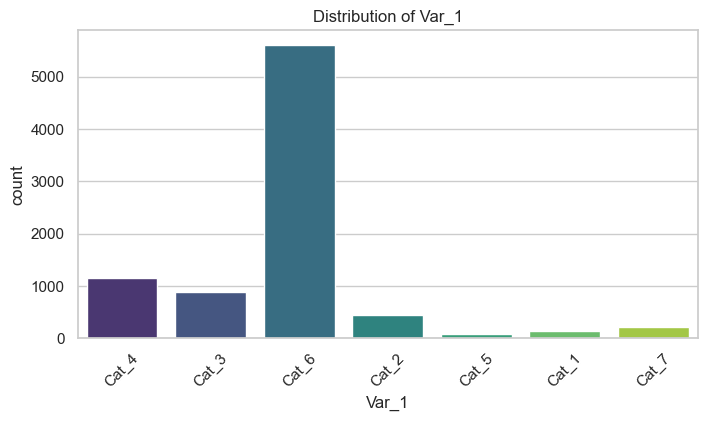


Value counts for Var_1:
Var_1
Cat_6    0.657478
Cat_4    0.135367
Cat_3    0.103343
Cat_2    0.052082
Cat_7    0.025103
Cat_1    0.016305
Cat_5    0.010323
Name: proportion, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\2733532521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Dataset_Train, x=col, palette='viridis')


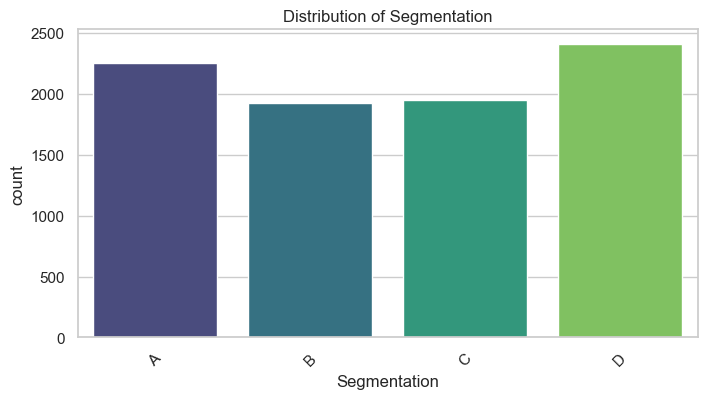


Value counts for Segmentation:
Segmentation
D    0.282229
A    0.263930
C    0.228387
B    0.225455
Name: proportion, dtype: float64


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=Dataset_Train, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    
    # Print value counts
    print(f"\nValue counts for {col}:")
    print(Dataset_Train[col].value_counts(normalize=True))  # Proportions

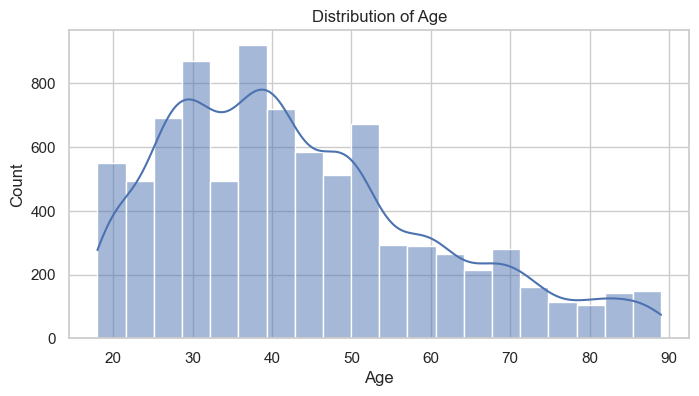


Statistics for Age:
count    8525.000000
mean       43.510733
std        16.801747
min        18.000000
25%        30.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64


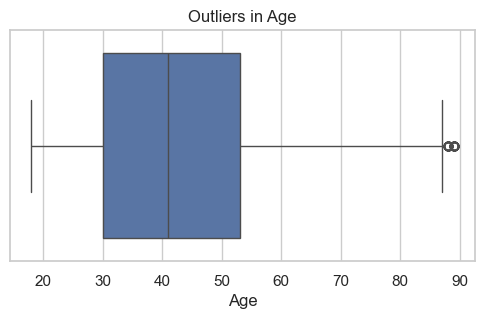

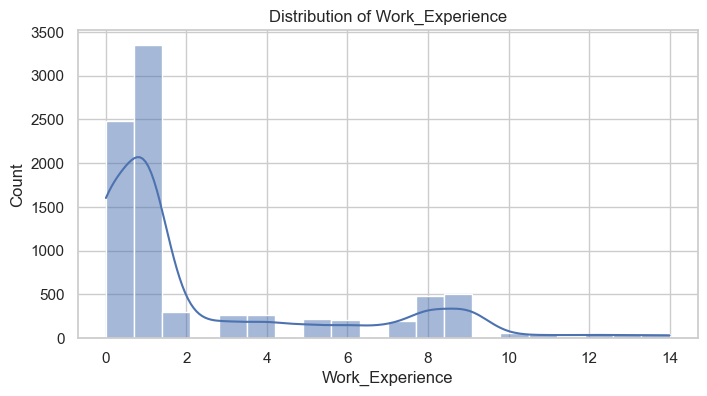


Statistics for Work_Experience:
count    8525.000000
mean        2.459120
std         3.265489
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: Work_Experience, dtype: float64


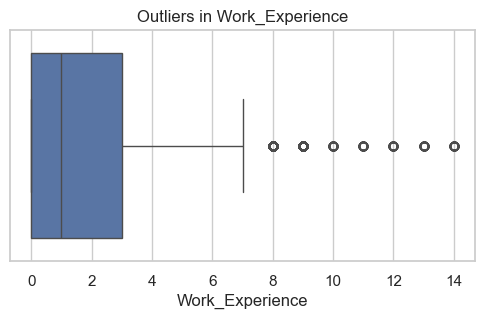

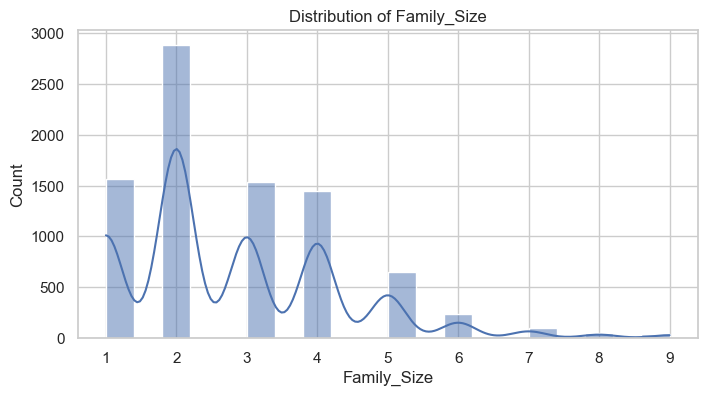


Statistics for Family_Size:
count    8525.000000
mean        2.807273
std         1.513445
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64


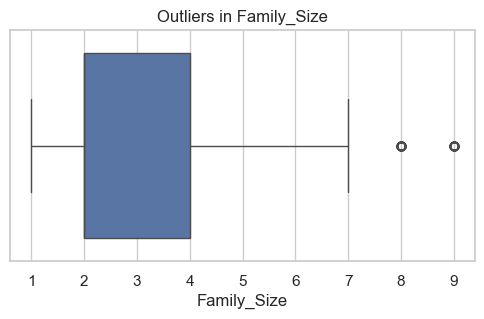

In [97]:
num_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=Dataset_Train, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Summary statistics
    print(f"\nStatistics for {col}:")
    print(Dataset_Train[col].describe())
    
    # Boxplot to check outliers
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=Dataset_Train, x=col)
    plt.title(f'Outliers in {col}')
    plt.show()

## Bivariate analysis

predictor vs response graphs

F-statistic: 54.14842174605253
P-value: 1.157082005011613e-34


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\3110824858.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmentation', y='Family_Size', data=Dataset_Train, palette='Set2')


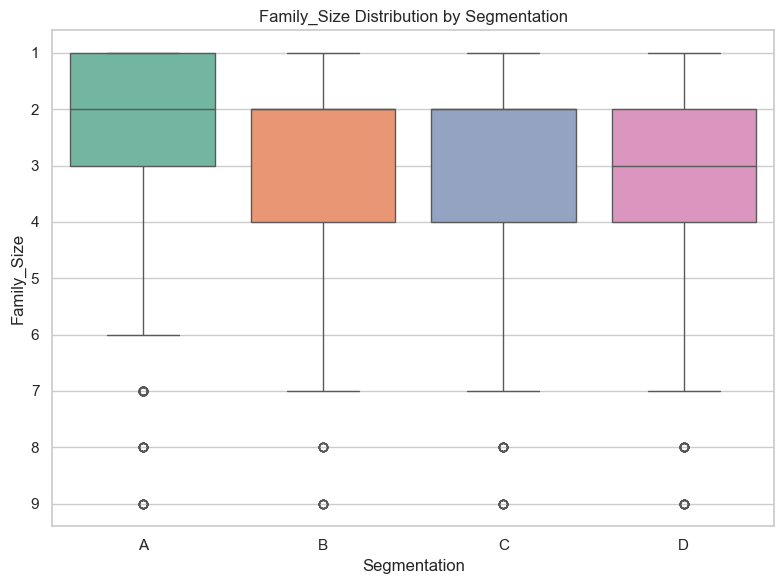

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# One-Way ANOVA
groups = Dataset_Train['Segmentation'].unique()
age_groups = [Dataset_Train[Dataset_Train['Segmentation'] == group]['Family_Size'] for group in groups]

f_stat, p_val = f_oneway(*age_groups)
print("F-statistic:", f_stat)
print("P-value:", p_val)


#  Graph 1: Boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segmentation', y='Family_Size', data=Dataset_Train, palette='Set2')
plt.title("Family_Size Distribution by Segmentation")
plt.xlabel("Segmentation")
plt.ylabel("Family_Size")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

F-statistic: 371.3836633482526
P-value: 1.0591665071752763e-226


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\3929825820.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmentation', y='Age', data=Dataset_Train, palette='Set2')


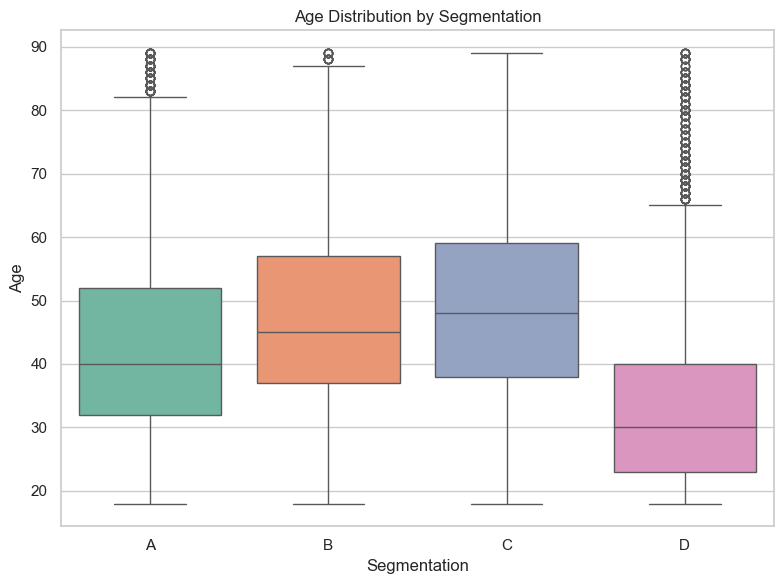

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# One-Way ANOVA
groups = Dataset_Train['Segmentation'].unique()
age_groups = [Dataset_Train[Dataset_Train['Segmentation'] == group]['Age'] for group in groups]

f_stat, p_val = f_oneway(*age_groups)
print("F-statistic:", f_stat)
print("P-value:", p_val)


#  Graph 1: Boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segmentation', y='Age', data=Dataset_Train, palette='Set2')
plt.title("Age Distribution by Segmentation")
plt.xlabel("Segmentation")
plt.ylabel("Age")
plt.tight_layout()
plt.show()





F-statistic: 12.954079130039611
P-value: 1.9358968068549756e-08


C:\Users\acer\AppData\Local\Temp\ipykernel_13144\4131604859.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmentation', y='Work_Experience', data=Dataset_Train, palette='Set2')


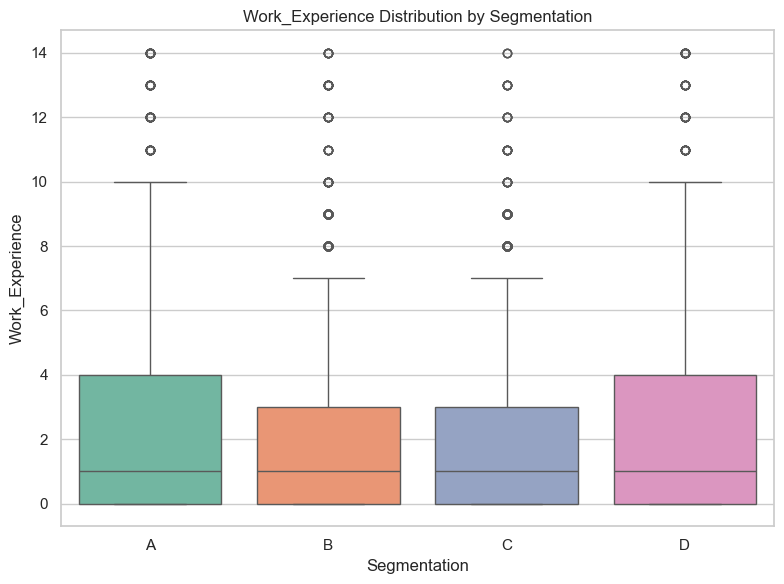

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# One-Way ANOVA
groups = Dataset_Train['Segmentation'].unique()
age_groups = [Dataset_Train[Dataset_Train['Segmentation'] == group]['Work_Experience'] for group in groups]

f_stat, p_val = f_oneway(*age_groups)
print("F-statistic:", f_stat)
print("P-value:", p_val)


#  Graph 1: Boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segmentation', y='Work_Experience', data=Dataset_Train, palette='Set2')
plt.title("Work_Experience Distribution by Segmentation")
plt.xlabel("Segmentation")
plt.ylabel("Work_Experience")
plt.tight_layout()
plt.show()


Chi-Square Statistic: 5.8284
Degrees of Freedom: 3
P-value: 0.1203

Grouped Bar Plot: Segmentation by Gender


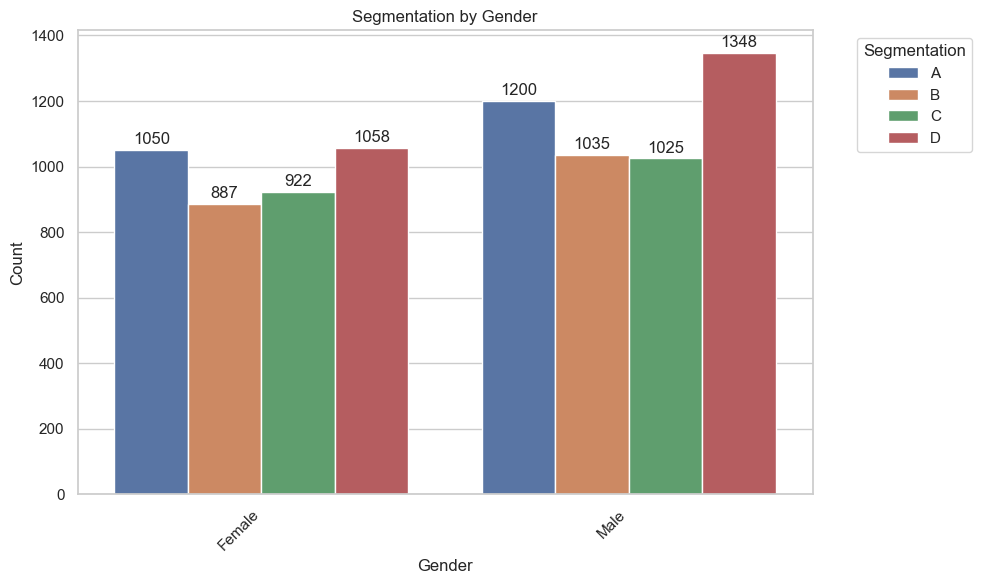


Chi-Square Statistic: 1043.3480
Degrees of Freedom: 3
P-value: 0.0000

Grouped Bar Plot: Segmentation by Ever_Married


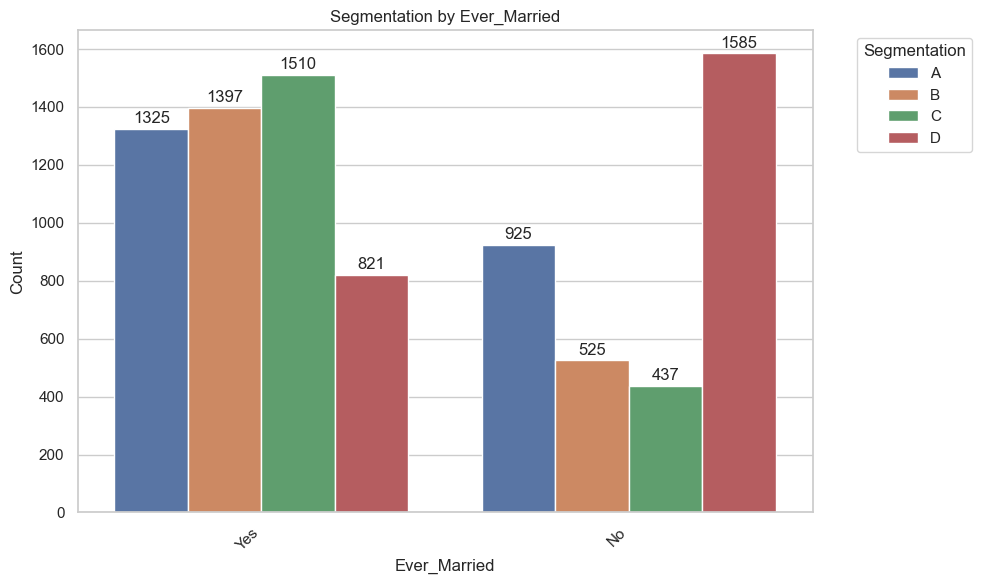


Chi-Square Statistic: 774.6387
Degrees of Freedom: 3
P-value: 0.0000

Grouped Bar Plot: Segmentation by Graduated


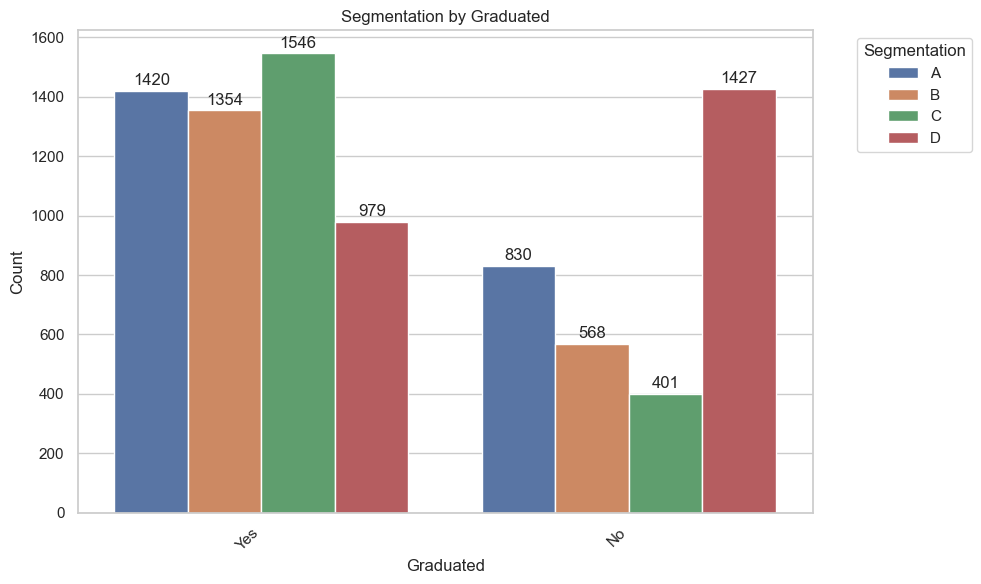


Chi-Square Statistic: 1886.6165
Degrees of Freedom: 24
P-value: 0.0000

Grouped Bar Plot: Segmentation by Profession


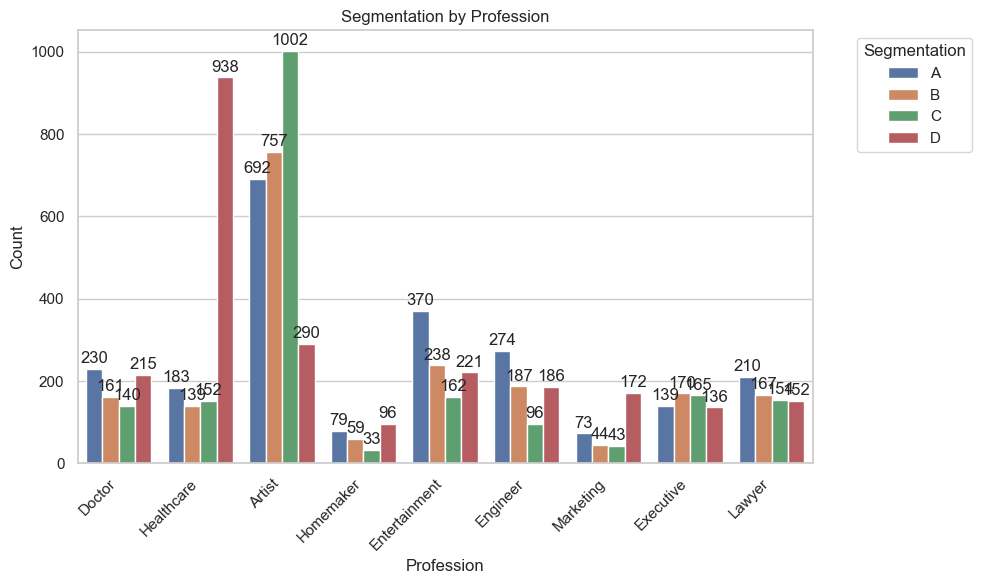


Chi-Square Statistic: 1091.8608
Degrees of Freedom: 6
P-value: 0.0000

Grouped Bar Plot: Segmentation by Spending_Score


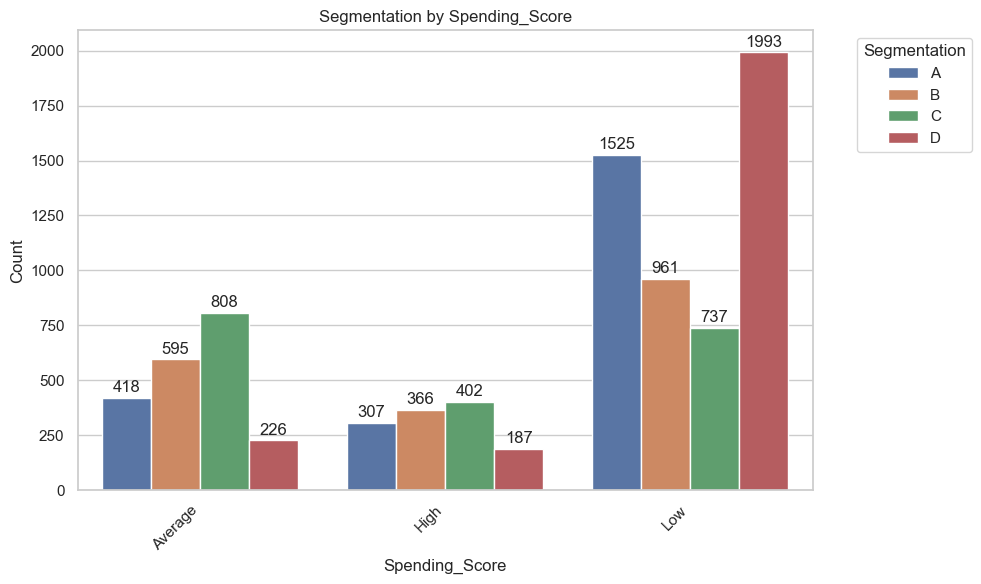


Chi-Square Statistic: 183.9668
Degrees of Freedom: 18
P-value: 0.0000

Grouped Bar Plot: Segmentation by Var_1


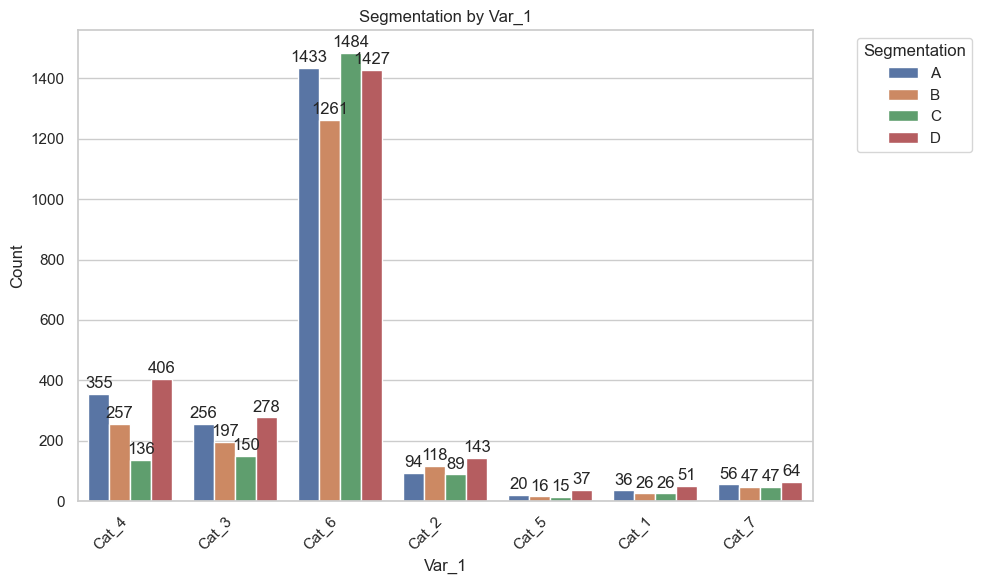

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Categorical variables (including high-cardinality ones)
categorical_vars = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
target = 'Segmentation'

sns.set(style='whitegrid')

for var in categorical_vars:

    # Create a contingency table (profession vs segmentation counts)
    contingency_table = pd.crosstab(Dataset_Train[var], Dataset_Train['Segmentation'])

    # ✅ Step 2: Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p:.4f}")


    print(f"\nGrouped Bar Plot: {target} by {var}")

    plt.figure(figsize=(10, 6))  # Increased figure size
    ax = sns.countplot(data=train_new, x=var, hue=target)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Add counts on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

    plt.title(f'{target} by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



Numerical vs Numerical variable graphs


Scatter Plot: Age vs Work_Experience


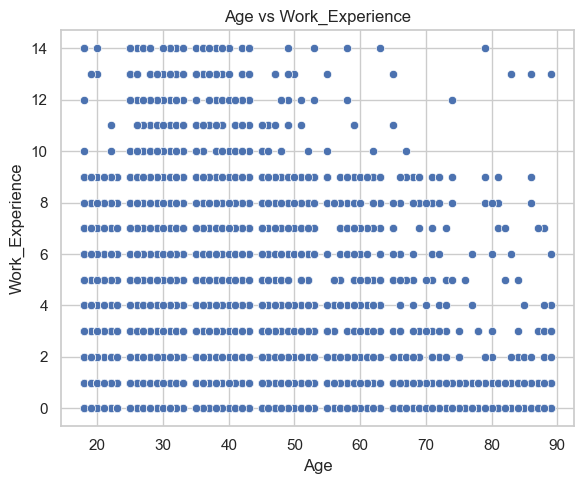


Scatter Plot: Age vs Family_Size


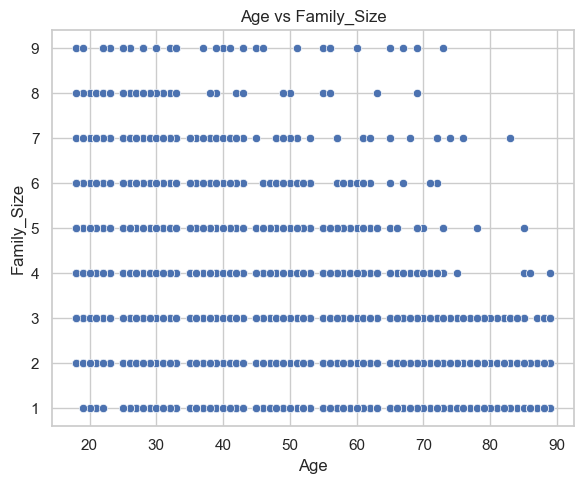


Scatter Plot: Work_Experience vs Family_Size


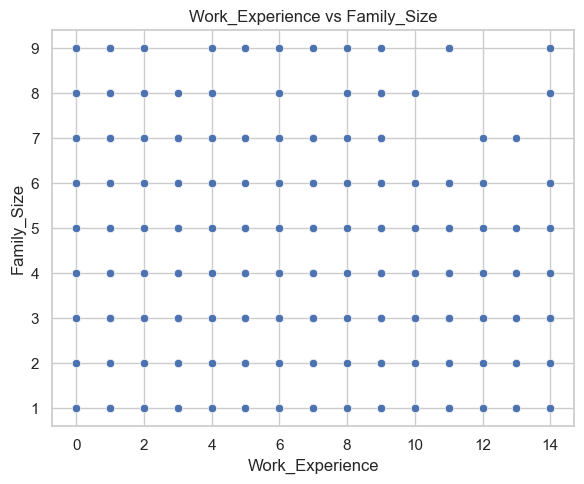

In [102]:
# Numerical vs Numerical: All pairs among numerical variables
from itertools import combinations
numerical_vars = ['Age', 'Work_Experience', 'Family_Size']

num_pairs = list(combinations(numerical_vars, 2))

for x_var, y_var in num_pairs:
    print(f"\nScatter Plot: {x_var} vs {y_var}")
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=train_new, x=x_var, y=y_var)
    plt.title(f"{x_var} vs {y_var}")
    plt.tight_layout()
    plt.show()



Box Plot: Age by Gender


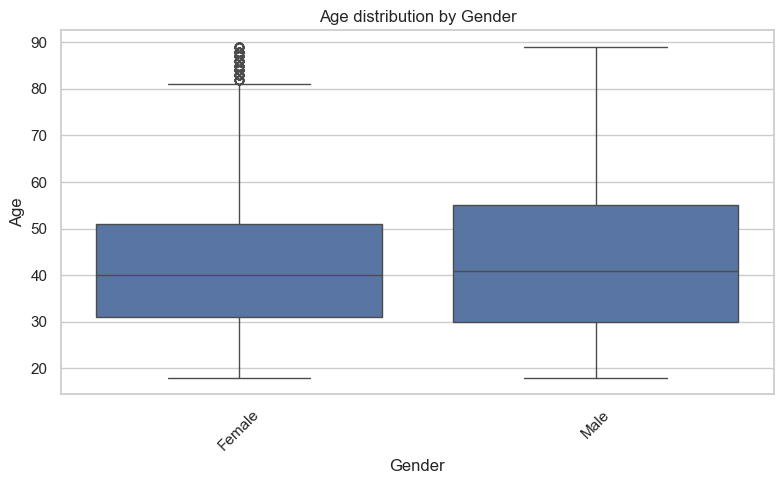


Box Plot: Work_Experience by Gender


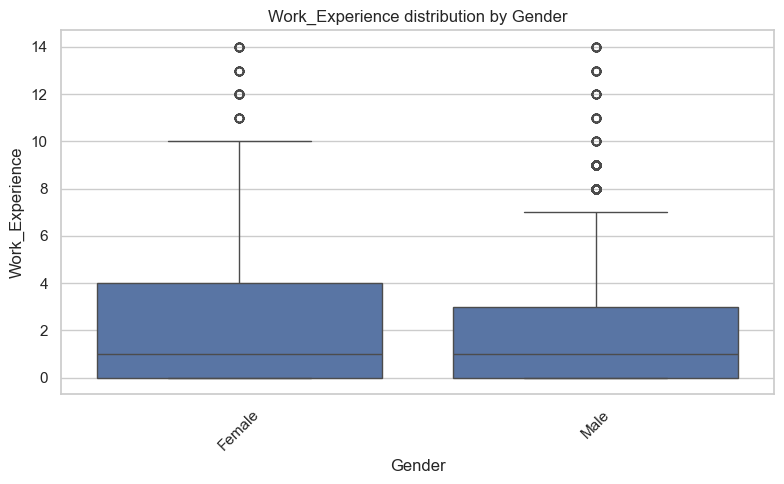


Box Plot: Family_Size by Gender


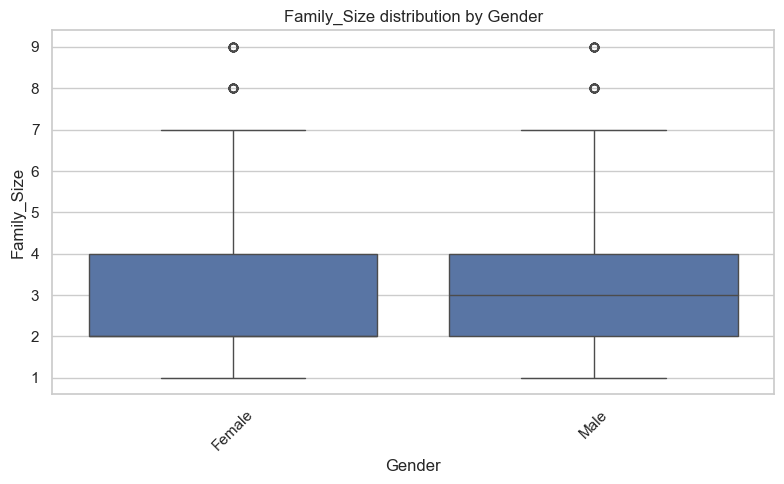


Box Plot: Age by Ever_Married


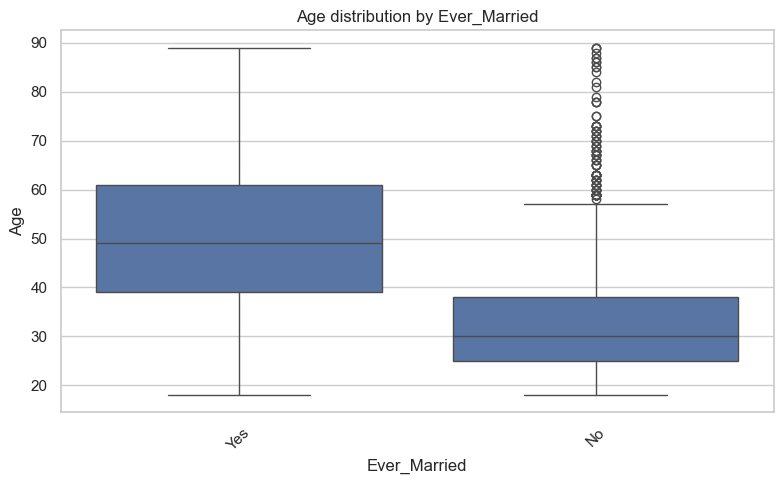


Box Plot: Work_Experience by Ever_Married


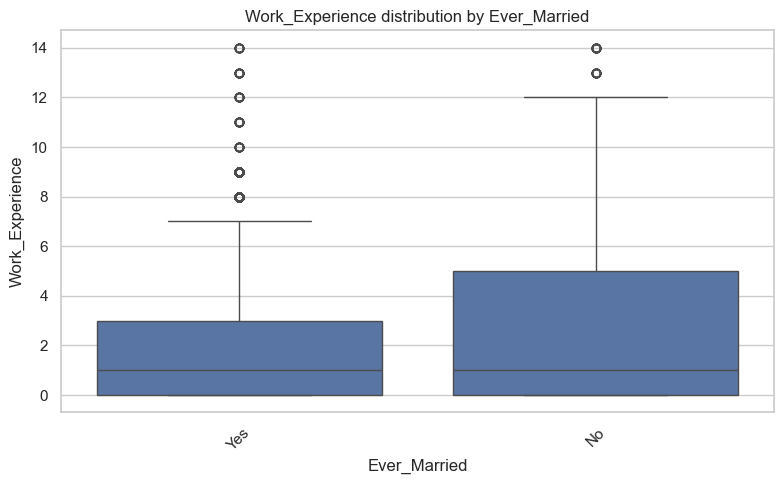


Box Plot: Family_Size by Ever_Married


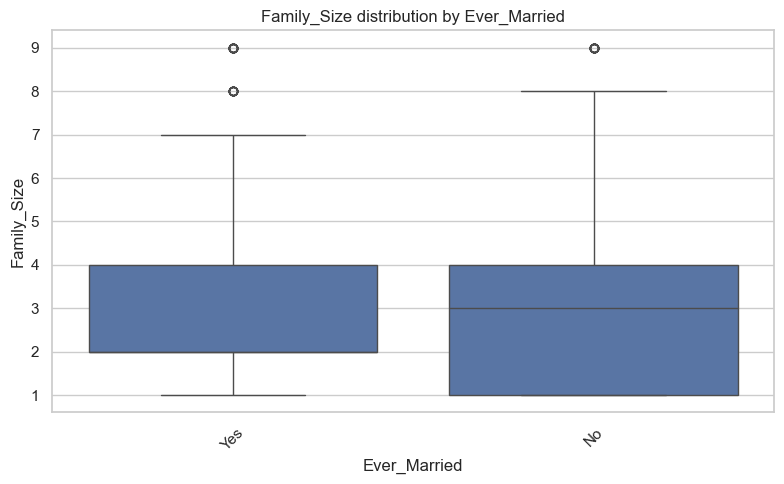


Box Plot: Age by Graduated


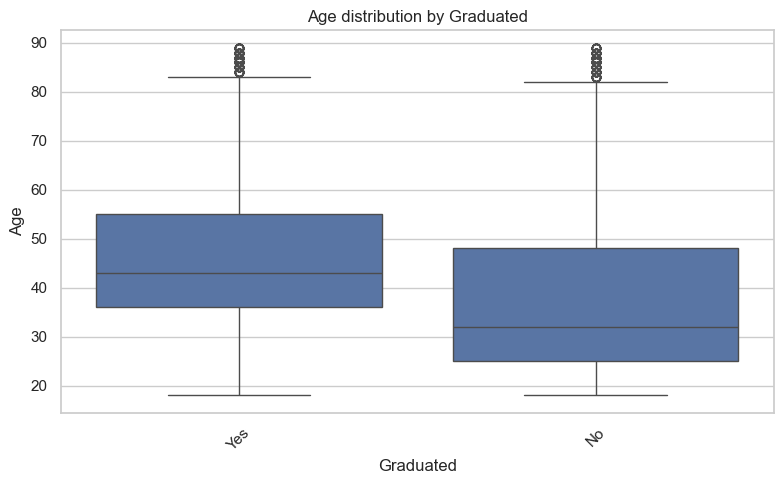


Box Plot: Work_Experience by Graduated


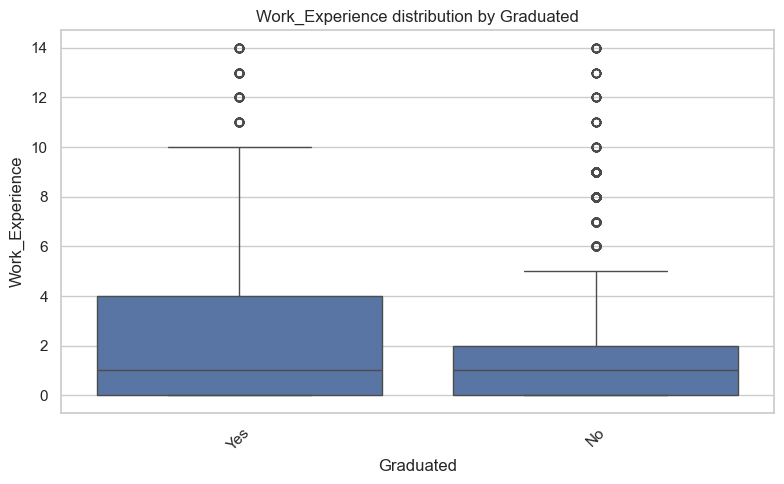


Box Plot: Family_Size by Graduated


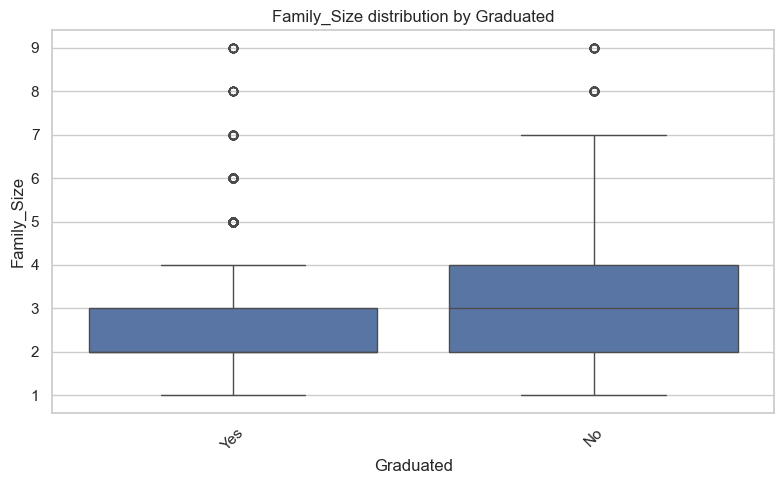


Box Plot: Age by Profession


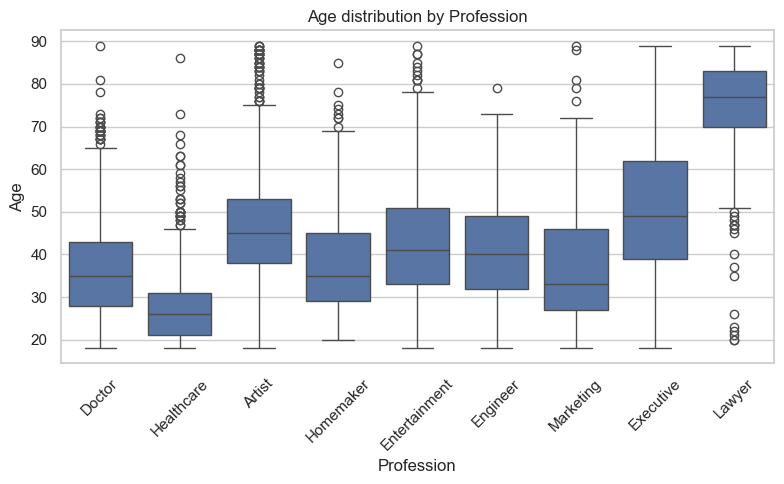


Box Plot: Work_Experience by Profession


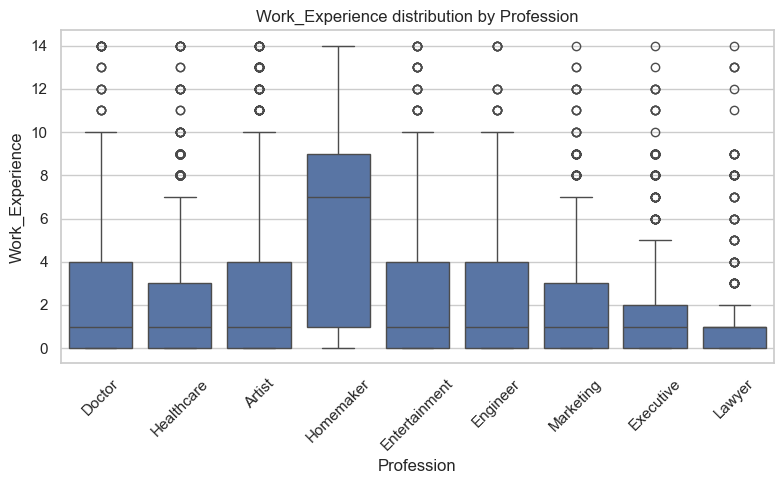


Box Plot: Family_Size by Profession


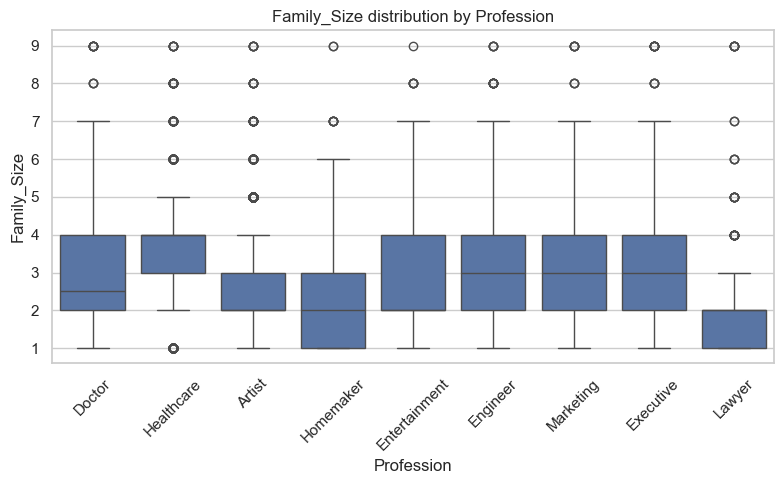


Box Plot: Age by Spending_Score


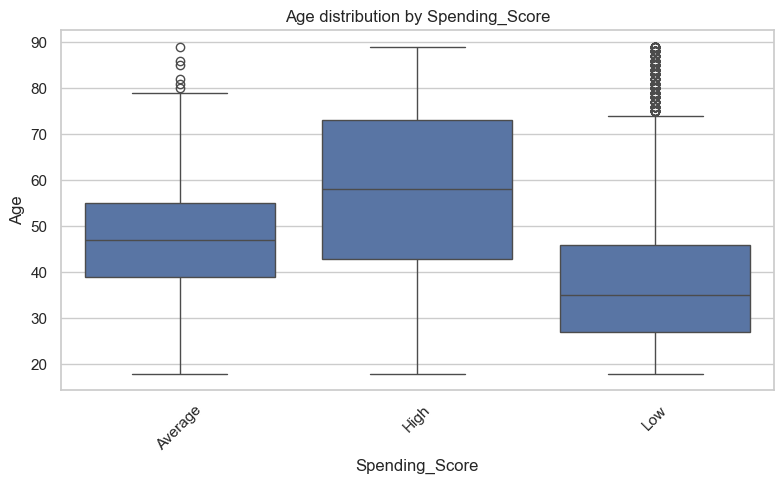


Box Plot: Work_Experience by Spending_Score


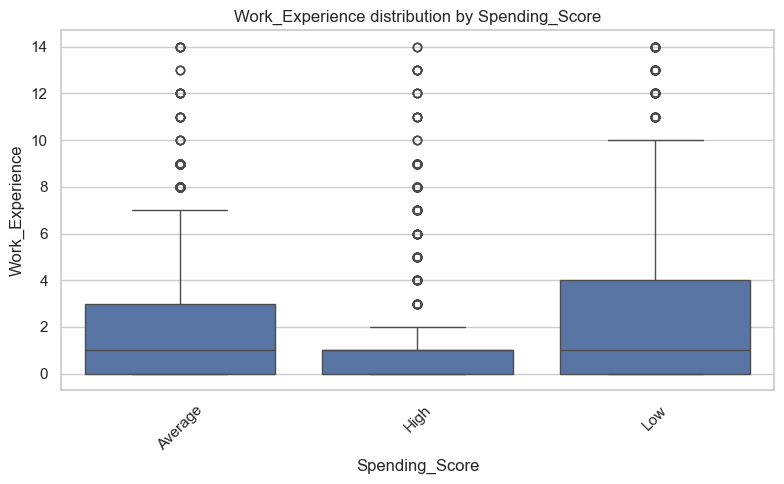


Box Plot: Family_Size by Spending_Score


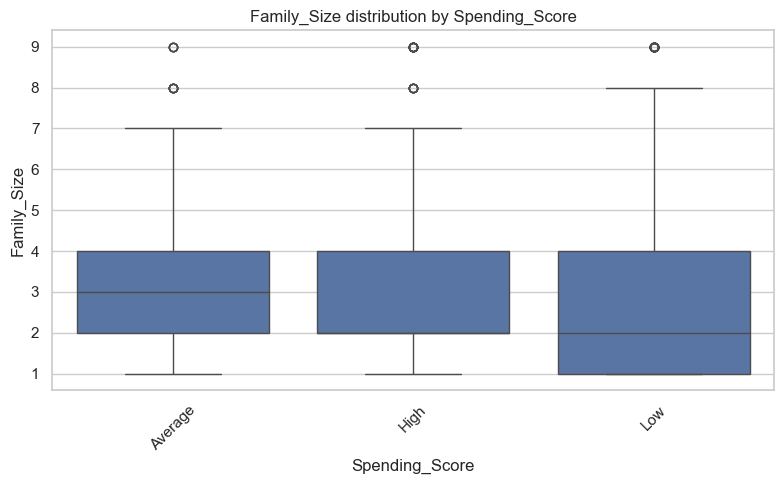


Box Plot: Age by Var_1


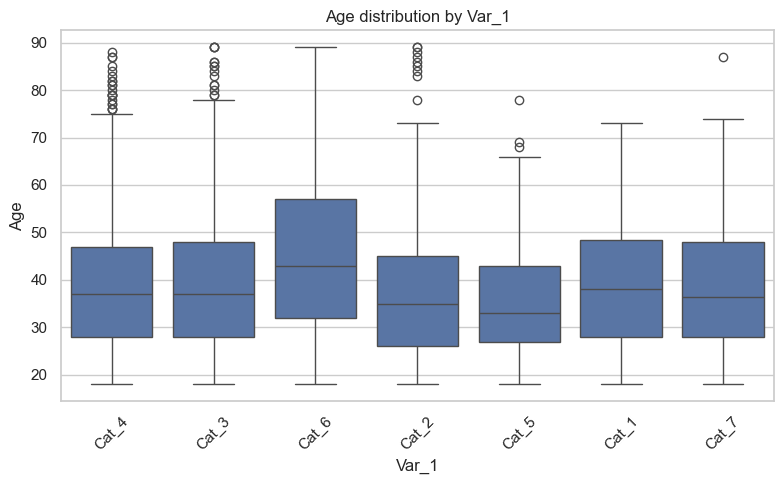


Box Plot: Work_Experience by Var_1


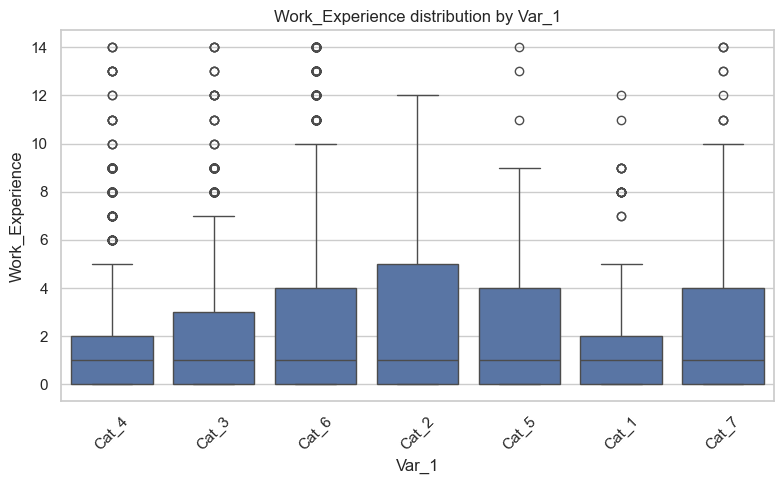


Box Plot: Family_Size by Var_1


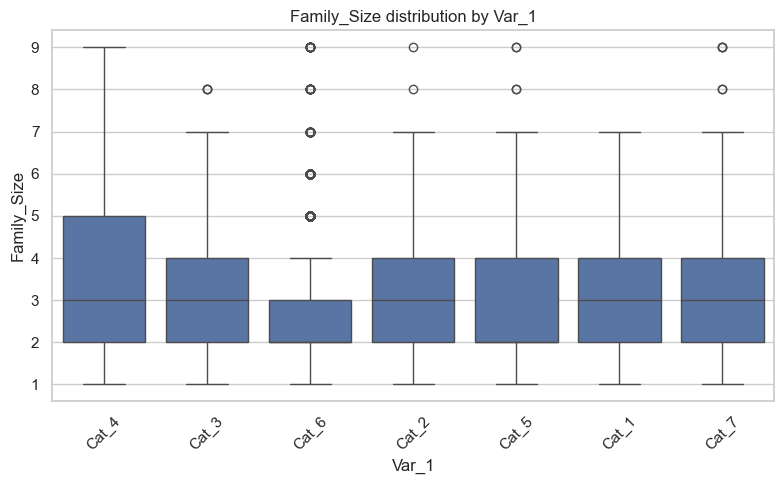

In [103]:
# Categorical vs Numerical: Each categorical variable vs each numerical variable
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        print(f"\nBox Plot: {num_var} by {cat_var}")
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_var, y=num_var, data=train_new)
        plt.title(f"{num_var} distribution by {cat_var}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## Multivariate Analysis

Multicollinearity between numerical variables

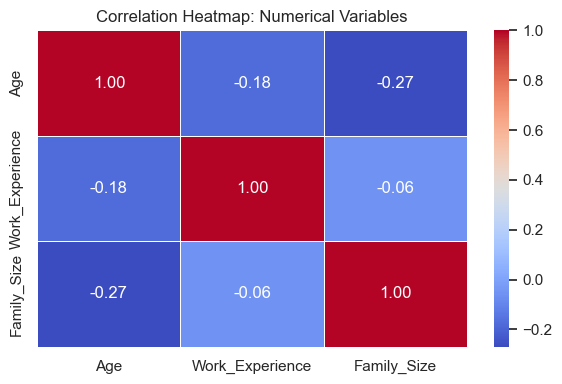

In [104]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_vars = ['Age', 'Work_Experience', 'Family_Size']

# Compute the correlation matrix
corr_matrix = train_new[numerical_vars].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Numerical Variables")
plt.tight_layout()
plt.show()


Multicollinearity between categorical variables

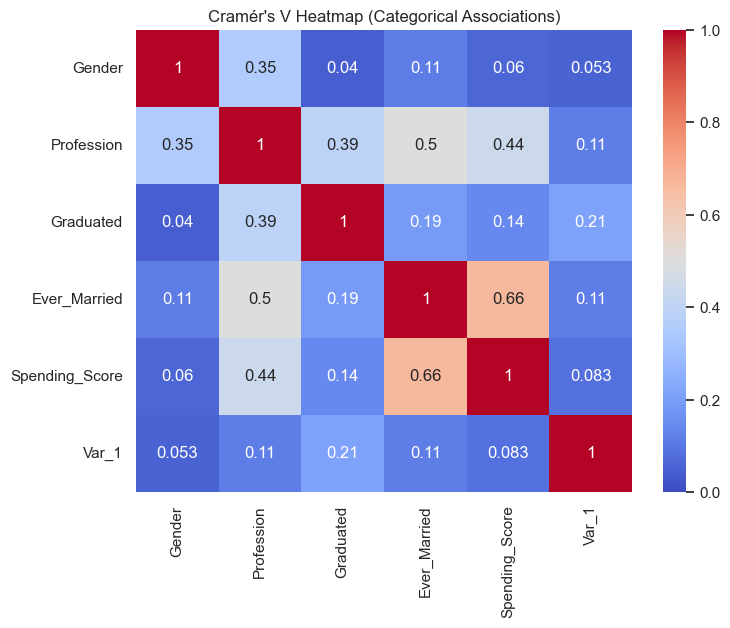

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Apply to a DataFrame of categorical columns
def cramers_v_matrix(df):
    cols = df.columns
    matrix = pd.DataFrame(index=cols, columns=cols)
    
    for col1 in cols:
        for col2 in cols:
            matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    return matrix.astype(float)

# Example
cat_cols = ['Gender', 'Profession', 'Graduated', 'Ever_Married','Spending_Score', 'Var_1']
cramers_v_df = cramers_v_matrix(Dataset_Train[cat_cols])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Heatmap (Categorical Associations)")
plt.show()


Multicollinearity between categorical and numerical variables

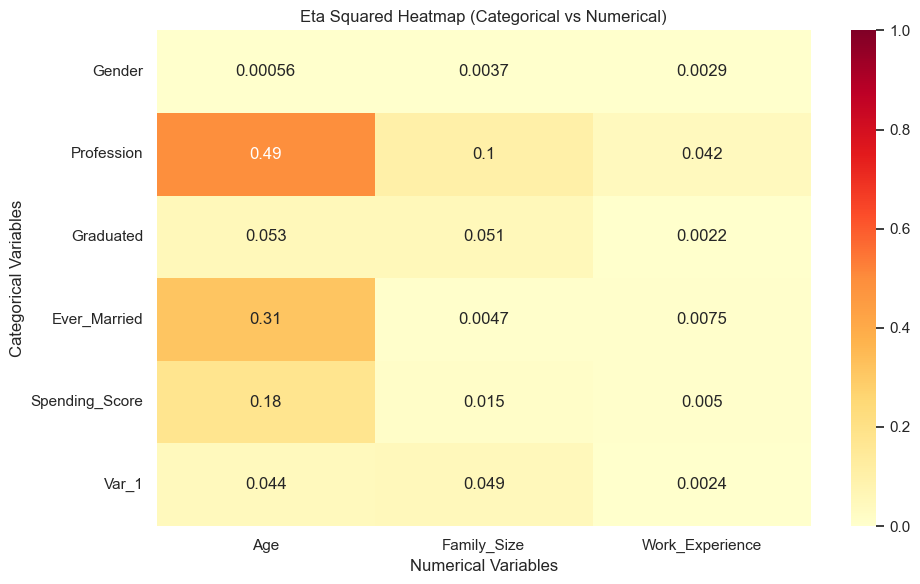

,Age,Family_Size,Work_Experience
Gender,0.000562,0.003738,0.002850
Profession,0.494731,0.102393,0.042313
Graduated,0.053318,0.051412,0.002248
Ever_Married,0.313911,0.004734,0.007506
Spending_Score,0.177277,0.014554,0.005023
Var_1,0.043732,0.049083,0.002404


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute Eta Squared
def eta_squared(cat, num):
    """
    cat: categorical variable (Series)
    num: numerical variable (Series)
    returns: eta squared value
    """
    categories = cat.dropna().unique()
    y = num.dropna()
    x = cat[num.notnull()]  
    groups = [y[x == group] for group in categories]
    
    ss_between = sum(len(g) * (g.mean() - y.mean())**2 for g in groups)
    ss_total = sum((y - y.mean())**2)
    
    return ss_between / ss_total if ss_total > 0 else 0

# Function to create a heatmap of eta squared values
def eta_squared_heatmap(df, cat_cols, num_cols):
    """
    df: DataFrame containing your data
    cat_cols: list of categorical column names
    num_cols: list of numerical column names
    """
    eta_matrix = pd.DataFrame(index=cat_cols, columns=num_cols)
    
    for cat in cat_cols:
        for num in num_cols:
            eta = eta_squared(df[cat], df[num])
            eta_matrix.loc[cat, num] = eta

    eta_matrix = eta_matrix.astype(float)

    plt.figure(figsize=(10, 6))
    sns.heatmap(eta_matrix, annot=True, cmap="YlOrRd", vmin=0, vmax=1)
    plt.title("Eta Squared Heatmap (Categorical vs Numerical)")
    plt.xlabel("Numerical Variables")
    plt.ylabel("Categorical Variables")
    plt.tight_layout()
    plt.show()

    return eta_matrix


categorical_columns = ['Gender', 'Profession', 'Graduated', 'Ever_Married','Spending_Score', 'Var_1']
numerical_columns = ['Age', 'Family_Size','Work_Experience']

eta_squared_heatmap(Dataset_Train, categorical_columns, numerical_columns)


Factor Analysis for Mixed Variables

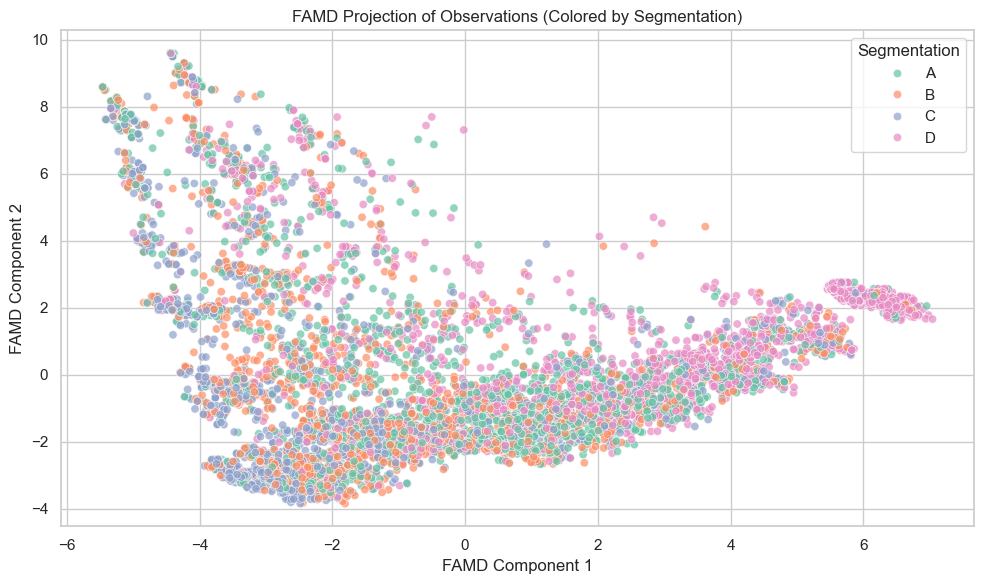

C:\Users\acer\AppData\Local\Temp\ipykernel_13144\404611106.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  var1 = explained_var[0] * 100
C:\Users\acer\AppData\Local\Temp\ipykernel_13144\404611106.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  var2 = explained_var[1] * 100


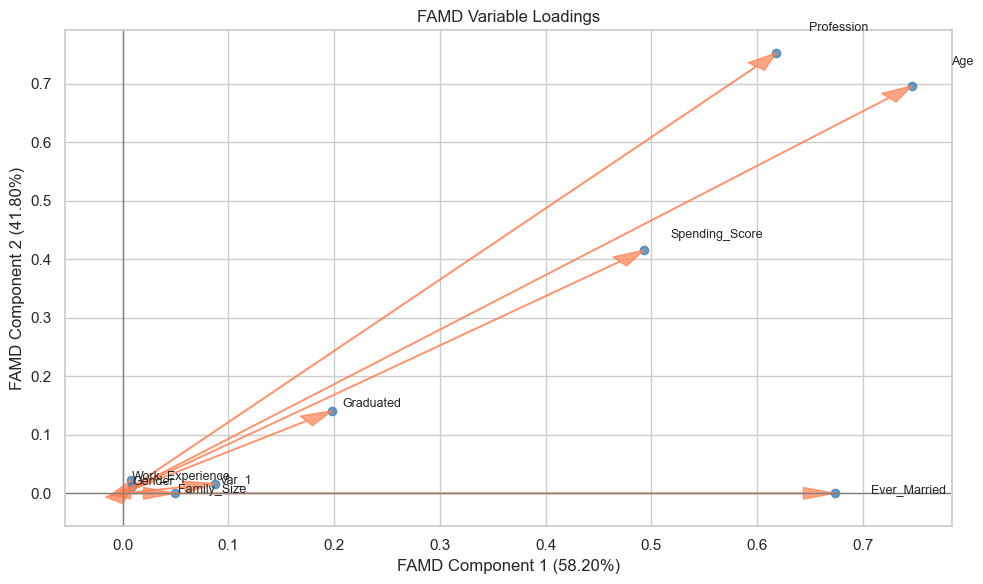

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince


# Separate features and target
X = Dataset_Train.drop(['Segmentation'], axis=1)
y = Dataset_Train['Segmentation']

# Combine features and target for visualization
famd_data = X.copy()
famd_data['Segmentation'] = y.values


# Initialize and Fit FAMD 
famd = prince.FAMD(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

famd.fit(famd_data.drop(columns=["Segmentation"]))

# Row Projections (FAMD coordinates for samples)
row_coords = famd.row_coordinates(famd_data.drop(columns=["Segmentation"]))
row_coords.columns = ['FAMD_1', 'FAMD_2']
row_coords["Segmentation"] = y.values

# Plot 2D projection of observations with color by segmentation class
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=row_coords['FAMD_1'], 
    y=row_coords['FAMD_2'], 
    hue=row_coords["Segmentation"], 
    palette="Set2", 
    alpha=0.7
)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Projection of Observations (Colored by Segmentation)")
plt.grid(True)
plt.legend(title="Segmentation", loc="best")
plt.tight_layout()
plt.show()

# Variable Loadings Plot 
loadings = famd.column_coordinates_

plt.figure(figsize=(10, 6))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Plot each variable loading as a vector
for i in range(loadings.shape[0]):
    x, y = loadings.iloc[i, 0], loadings.iloc[i, 1]
    plt.scatter(x, y, color="steelblue", alpha=0.8)
    plt.arrow(0, 0, x, y, color="coral", alpha=0.7, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.05, y * 1.05, loadings.index[i], fontsize=9)

# Estimate variance explained by each component (approximation)
explained_var = row_coords[['FAMD_1', 'FAMD_2']].var() / row_coords[['FAMD_1', 'FAMD_2']].var().sum()
var1 = explained_var[0] * 100
var2 = explained_var[1] * 100

plt.xlabel(f"FAMD Component 1 ({var1:.2f}%)")
plt.ylabel(f"FAMD Component 2 ({var2:.2f}%)")
plt.title("FAMD Variable Loadings")
plt.grid(True)
plt.tight_layout()
plt.show()


Finding best number of clusters

For n_clusters = 2, Average Silhouette Score = 0.4869
For n_clusters = 3, Average Silhouette Score = 0.5451
For n_clusters = 4, Average Silhouette Score = 0.4861
For n_clusters = 5, Average Silhouette Score = 0.4939
For n_clusters = 6, Average Silhouette Score = 0.4744


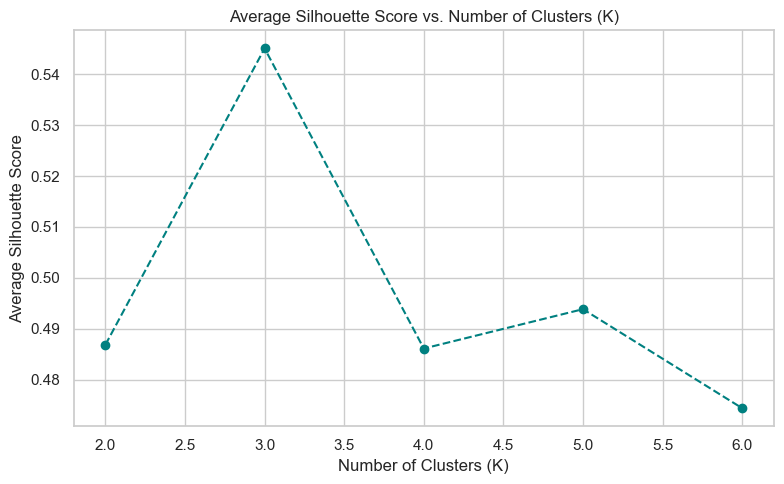

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract FAMD 2D components from row_coords DataFrame
famd_2d = row_coords[['FAMD_1', 'FAMD_2']]  

# Define range of cluster numbers to evaluate
range_n_clusters = list(range(2, 7))
silhouette_avgs = []

# Compute silhouette score for each K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(famd_2d)
    
    silhouette_avg = silhouette_score(famd_2d, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, Average Silhouette Score = {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avgs, marker='o', linestyle='--', color='teal')
plt.title("Average Silhouette Score vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


K-means clustering

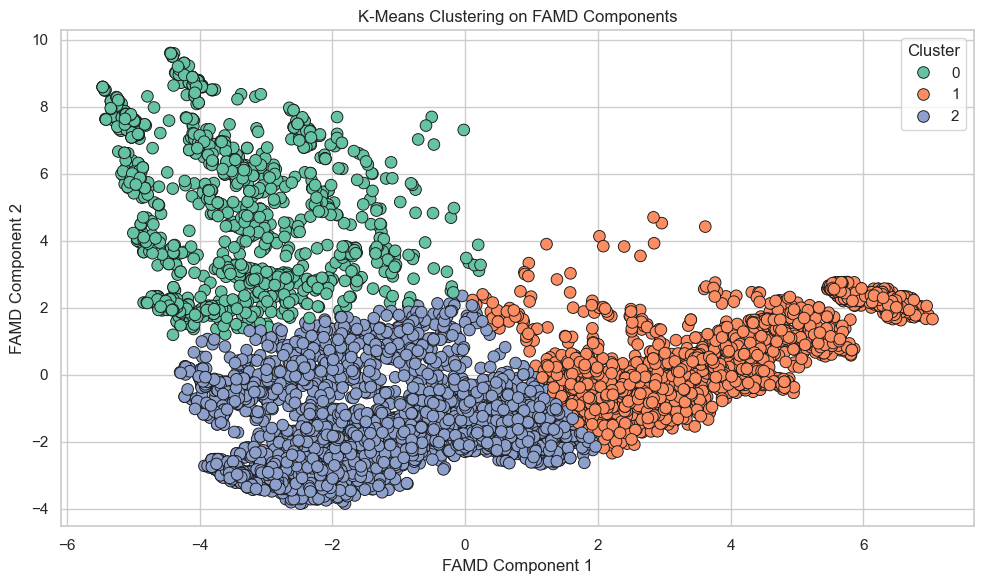

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
row_coords["Cluster"] = kmeans.fit_predict(row_coords[['FAMD_1', 'FAMD_2']])

# Plot Clusters (FAMD space) 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='FAMD_1', y='FAMD_2',
    hue='Cluster',
    palette='Set2',
    data=row_coords,
    s=70, edgecolor='k'
)
plt.title("K-Means Clustering on FAMD Components")
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()



Checking for multivariate outliers

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# Select the numerical components (FAMD output or raw numerical)
data = row_coords[['FAMD_1', 'FAMD_2']]  
# Compute mean and covariance matrix
mean_vector = data.mean().values
cov_matrix = np.cov(data.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Compute Mahalanobis distance for each point
mahalanobis_distances = data.apply(lambda x: mahalanobis(x, mean_vector, inv_cov_matrix), axis=1)
row_coords['Mahalanobis_Distance'] = mahalanobis_distances

# Define a threshold for outlier detection
threshold = chi2.ppf(0.99, df=data.shape[1])  # 99% confidence level
row_coords['Outlier'] = row_coords['Mahalanobis_Distance'] ** 2 > threshold

# View outliers
outliers_df = row_coords[row_coords['Outlier'] == True]
print(f"Number of multivariate outliers detected: {outliers_df.shape[0]}")


Number of multivariate outliers detected: 221


Visualization of multivariate outliers

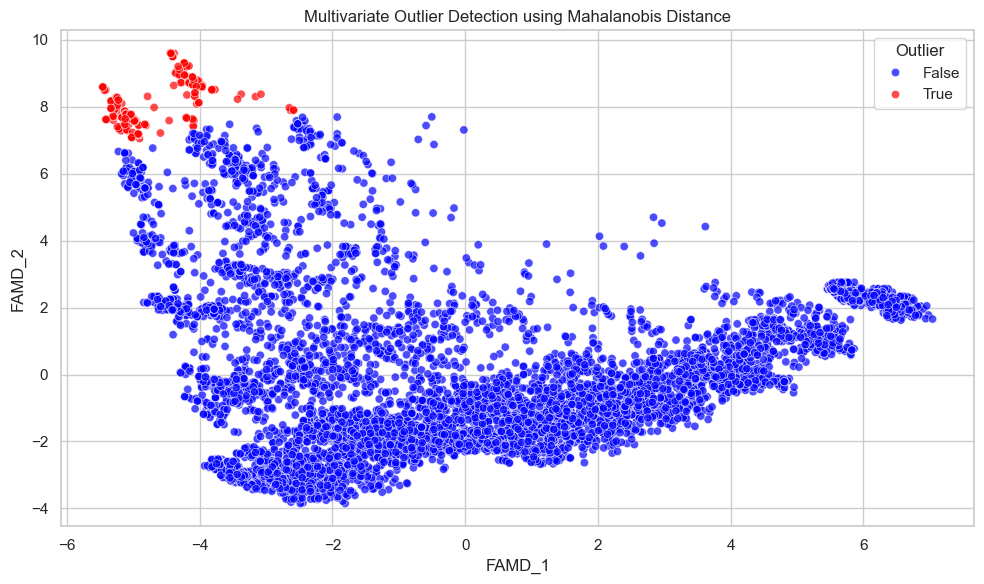

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=row_coords, 
    x='FAMD_1', y='FAMD_2',
    hue='Outlier',
    palette={False: 'blue', True: 'red'},
    alpha=0.7
)
plt.title("Multivariate Outlier Detection using Mahalanobis Distance")
plt.grid(True)
plt.tight_layout()
plt.show()
